In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import calendar

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('/fcc-forum-pageviews.csv', parse_dates=True, index_col='date')

# Clean data
bottom = df['value'].quantile(2.5 / 100)
top = df['value'].quantile((100 - 2.5) / 100)
df = df[(df['value'] > bottom) & (df['value'] < top)]


def draw_line_plot():
  # Draw line plot

  figure, axis = plt.subplots(figsize=(15, 5))
  axis.plot(df.index, df['value'], 'firebrick')
  axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
                 loc='center',
                 fontstyle='oblique',
                 fontsize='medium')
  axis.set(xlabel='Date', ylabel='Page Views')
  plt.close()

  # Save image and return fig (don't change this part)
  # fig.savefig('line_plot.png')
  return figure


def draw_bar_plot():
  # Copy and modify data for monthly bar plot
  df_bar = df.groupby([df.index.year,
                       df.index.month_name()]).mean().value.unstack()

  # Sort columns by month names
  df_bar = df_bar[list(calendar.month_name)[1:]]
  df_bar.columns.name = "Months"

  # Draw bar plot
  fig = df_bar.plot(kind="bar",
                    figsize=(10, 10),
                    xlabel="Years",
                    ylabel="Average Page Views").get_figure()

  # Save image and return fig (don't change this part)
  # fig.savefig('bar_plot.png')
  plt.close()
  return fig


def draw_box_plot():
  # Prepare data for box plots (this part is done!)
  df_box = df.copy()
    
  df_box['year'] = df_box.index.year
  df_box['month'] = df_box.index.strftime('%b')

  # Draw box plots (using Seaborn)
  figure = plt.figure(figsize=(20, 5))
  ax1 = figure.add_subplot(1, 2, 1)
  sns.boxplot(data=df_box,
              x='year',
              y='value',
              hue='year',
              legend=False,
              palette='Set1',
              ax=ax1)
  ax1.set(xlabel='Year',
           ylabel='Page Views',
           title='Year-wise Box Plot (Seasonality)')

  ax2 = figure.add_subplot(1, 2, 2)
  sns.boxplot(data=df_box,
              x='month',
              y='value',
              hue='month',
              legend=False,
              order=[
                  'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'
              ],
              palette='pastel',
              ax=ax2)
  ax2.set(xlabel='Month',
           ylabel='Page Views',
           title='Month-wise Box Plot (Seasonality)')
  plt.close()

  # Save image and return fig (don't change this part)
  # fig.savefig('box_plot.png')
  return figure



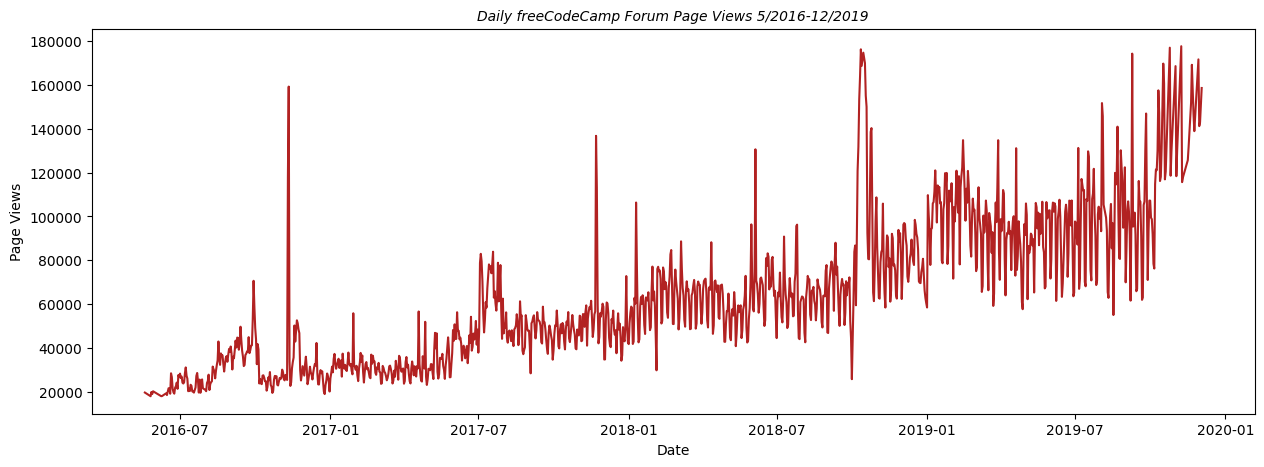

In [59]:
draw_line_plot()

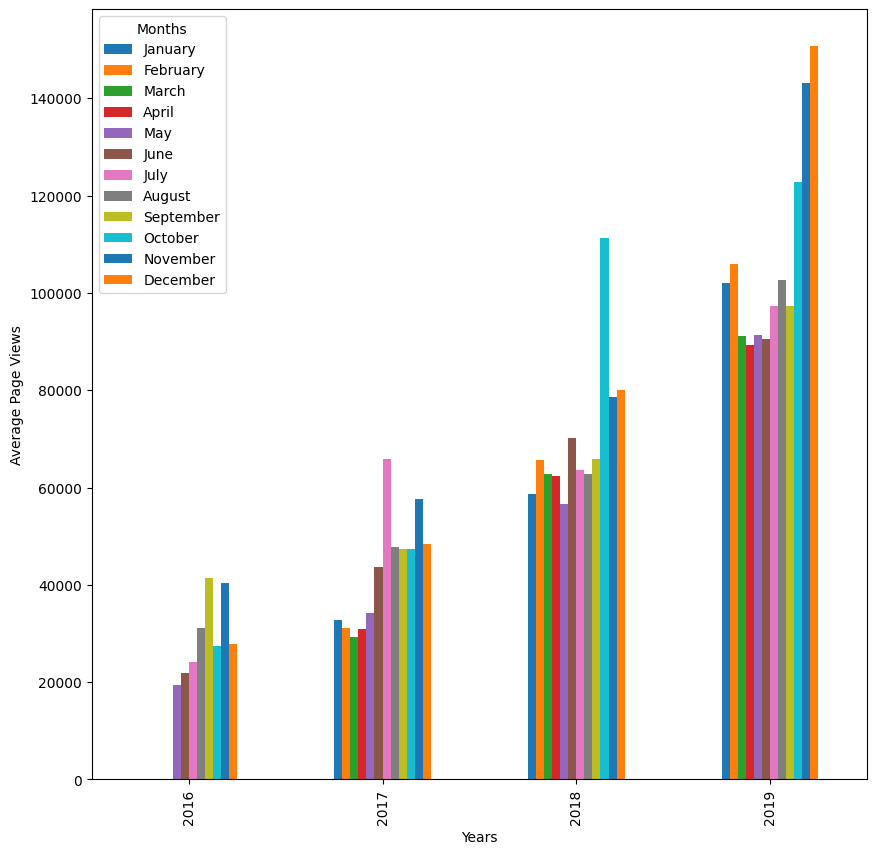

In [61]:
draw_bar_plot()

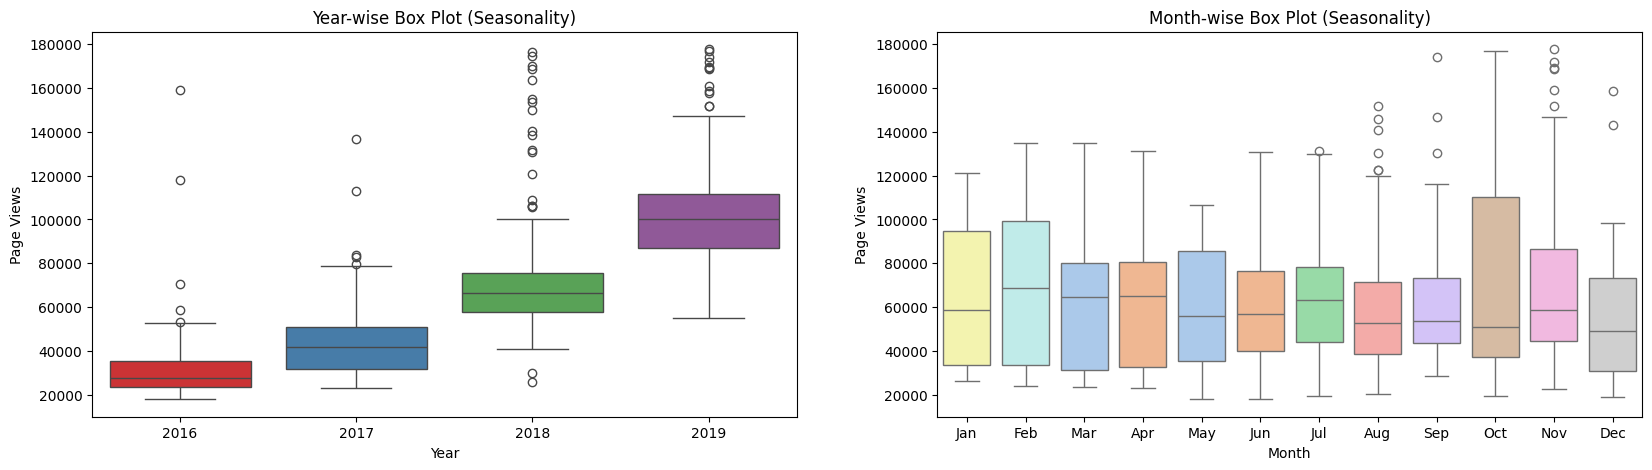

In [63]:
draw_box_plot()

In [ ]:
# Scratch notebook
# ## import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# df = pd.read_csv('/Users/mahrikadyrova/Desktop/Side hustles and hobbies/jup/fcc-forum-pageviews.csv', index_col='date')
# print(len(df))

# df['value'].max(), df['value'].quantile(2.5/100), df['value'].quantile((100-2.5)/100)
# bottom = df['value'].quantile(2.5/100)
# top = df['value'].quantile((100-2.5)/100)

# df = df[(df['value']>bottom) & (df['value']< top)]
# print(len(df))

# draw_line_plot(df)

# df.index = pd.to_datetime(df.index.values, format='%Y-%m-%d')

# figure, axis = plt.subplots(figsize=(15,5))
# axis.plot(df.index, df['value'], 'firebrick')
# axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', loc='center', fontstyle='oblique', fontsize='medium')
# axis.set(xlabel='Date', ylabel='Page Views')

# draw_line_plot(df)

# df_bar = df.copy()
# df_bar['DateYmd'] = pd.to_datetime(df.index.values, format='%Y-%m-%d')
# df_bar['DateY'] = df_bar['DateYmd'].dt.strftime('%Y')
# df_bar['DateYm'] = df_bar['DateYmd'].dt.strftime('%Y-%m')
# xBar = df_bar['DateYmd'].unique()
# barPlot = df_bar.groupby('DateYm')['value'].sum()
# import datetime
# fig, ax = plt.subplots(figsize=(10,10))
# barPlot.plot(ax=ax, kind='bar')

# ax.set(xlabel='Years', ylabel='Average Page Views')
# handles, labels = ax.get_legend_handles_labels()
# newLabels = [datetime.date(2016, int(monthInteger), 1).strftime('%B') for monthInteger in labels]
# ax.legend(handles=handles, labels=new_labels, loc='center')

# df_bar['months'] = pd.Categorical(df_bar.index.strftime('%B'), categories=months, ordered=True)
# months = monthsName[1:]

# import calendar

# df = pd.read_csv('/Users/mahrikadyrova/Desktop/Side hustles and hobbies/jup/fcc-forum-pageviews.csv', parse_dates=["date"], index_col="date")

# df['value'].max(), df['value'].quantile(2.5/100), df['value'].quantile((100-2.5)/100)
# bottom = df['value'].quantile(2.5/100)
# top = df['value'].quantile((100-2.5)/100)

# df = df[(df['value']>bottom) & (df['value']< top)]

# df_bar = df.groupby([df.index.year, df.index.month_name()]).mean().value.unstack()
# # Sort columns by month names
# df_bar = df_bar[list(calendar.month_name)[1:]]
# df_bar.columns.name = "Months"
# fig = df_bar.plot(kind="bar", figsize=(10,10), xlabel="Years", ylabel="Average Page Views").get_figure()
# # fig.savefig('bar_plot.png')

# # df_bar